### Inversion
In this analysis, we will use processed resistivity data obtained from GEOPHILUS to perform 1D inversion. This involves applying inversion techniques to interpret the subsurface resistivity distribution from the measured data. To effectively conduct this analysis, we need to import several libraries:

In [2]:
# %% import lberaries
import utm
import fiona
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from utm import to_latlon
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from inversion import InversionClass
from matplotlib.colors import LogNorm
from pygimli.frameworks import harmfit
from Data_Processing import DataProcessing
from sklearn.ensemble import IsolationForest
from matplotlib.ticker import FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from inversion import VESRhoModelling, VES2dModelling

### Input Configuration

In this section, we define the file paths and names required for the inversion tasks. Proper organization of these files is crucial for efficient analysis and ensures that the correct data is used throughout the process.


In [3]:
#%% inputs
# Define file paths and names
farmName = 'BDW_Seeschlag'
farmName_Processed = 'BDW_Seeschlag_Processed'
filepath_Original = 'BDW_Seeschlag_Geophilus_roh_2022-10-20.csv'
Inv_File_name = 'BDW_ Seeschlag_geophilus_eri_epsg4236'
# Import reference points from KML file
kmlFile = 'BW45701_Referenzpunkte_gemessen.kml'

### Initialization of Data Processing and Inversion Classes

Before diving into the data analysis, we need to initialize the core components that will handle data processing and inversion tasks. 

By initializing these classes, we establish the foundational components required for the subsequent data processing and inversion analysis. This setup ensures that all necessary functionalities are in place for handling the resistivity data and performing the modeling.


In [4]:
data_processor = DataProcessing()  
inversion_obj = InversionClass(data_processor)

### Importing Reference Points and Inversion Preparation

   - **Inversion Execution**:
     - We call the method `inversion_1D_all_lines` from the `InversionClass` instance (`inversion_obj`). This method performs 1D inversion on all lines of the processed data, using the file specified by `filepath_Processed`, the processed farm name (`farmName_Processed`), the inversion file name (`Inv_File_name`), and the extracted survey date (`survey_date`). The method returns inversion models (`Stmodels`) and chi-squared values (`chi2`), which are used to evaluate the fit of the inversion results.

This section of the code sets up the necessary data and parameters for performing 1D inversion on the resistivity data, ensuring that the data is correctly aligned, and the inversion is properly done.


In [9]:
refPoints = inversion_obj.import_reference_points_from_kml(kmlFile, farmName)
data_type_HLOF = 'LOF'
filepath_Processed = f"harmfitted_{data_type_HLOF}_{farmName}.txt"
Stmodels, chi2 = inversion_obj.inversion_1D_all_lines(filepath_Processed, farmName_Processed, Inv_File_name, survey_date)

### Inversion Results Subplot
This section of the code generates subplots that provide a detailed visual representation of the 1D inversion results. These plots are essential for analyzing and interpreting the resistivity data, helping to identify trends, anomalies, and overall patterns in the subsurface resistivity distribution.


C:\Users\Roudsari.S\inversion.py:397: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.03, 0.03, 0.93, 0.95])  # Adjust the layout to make room for the suptitle


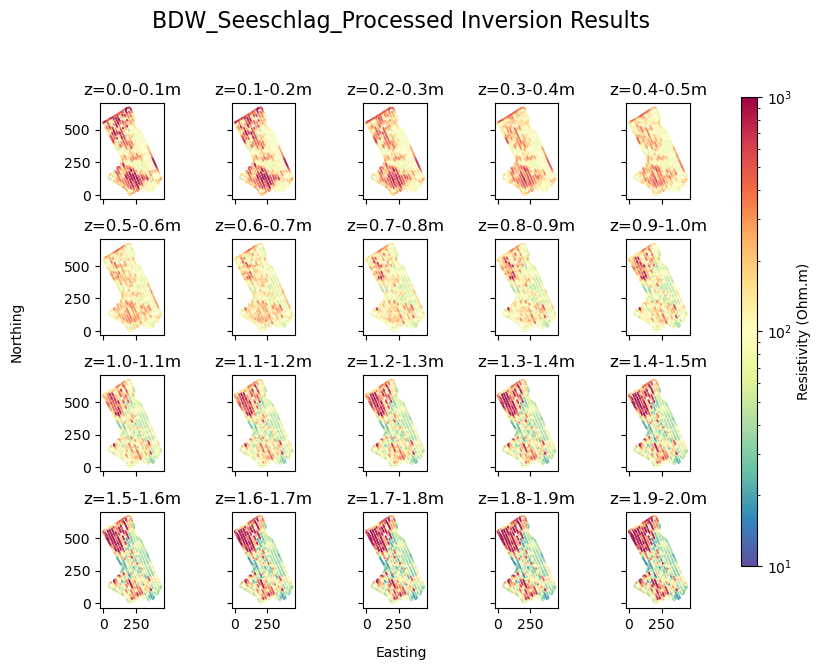

In [13]:
#%% inversion result subplot
lam =30
inv_res_filepath = f'1Dinv_response_all_lines_{farmName_Processed}.csv'
inversion_obj.subplot_inversion_results(inv_res_filepath, farmName_Processed)

### Inversion Results Subplot with Chi-Squared Limit

To refine our analysis of the inversion results, we need to filter and visualize only those results that meet certain quality criteria. Specifically, we are interested in plotting the inversion results where the chi-squared values are below a specified threshold. This helps to focus on the more reliable and accurate inversion outcomes.


C:\Users\Roudsari.S\inversion.py:452: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.03, 0.03, 0.93, 0.95])  # Adjust the layout to make room for the suptitle


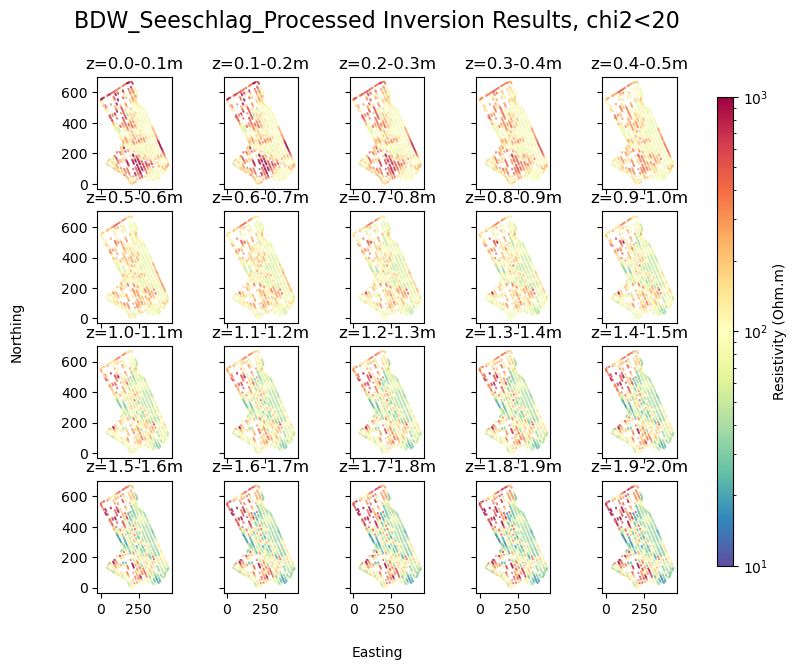

In [14]:
#%% inversion result subplot chi2<20
inv_res_filepath = f'1Dinv_response_all_lines_{farmName_Processed}.csv'
inversion_obj.subplot_inversion_limit_chi2(inv_res_filepath, farmName_Processed, Inv_File_name, chi2_limit=20)

### Plotting Chi-Squared Results

In addition to visualizing the inversion results, it's important to assess the quality of these results through the chi-square values. The chi-squared value quantifies the discrepancy between the observed data and the model predictions, serving as a key metric for evaluating the fit of the inversion.


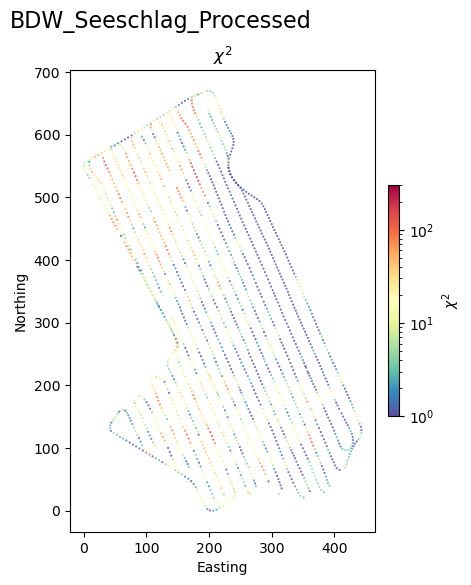

In [16]:
#%% plot Chi2
inv_res_filepath = f'1Dinv_response_all_lines_{farmName_Processed}.csv'
inversion_obj.plot_chi2_results(inv_res_filepath, farmName_Processed)

### Comparing ERi1 and ρₐ₁ with Inversion Results


This code segment facilitates a detailed comparison between the raw and processed resistivity data  for the first spacing and the inversion results for the first layer. 

Reference points saved to BDW_Seeschlag_Geophilus_roh_2022-10-20.csv_farm_reference_Points.csv


C:\Users\Roudsari.S\inversion.py:985: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


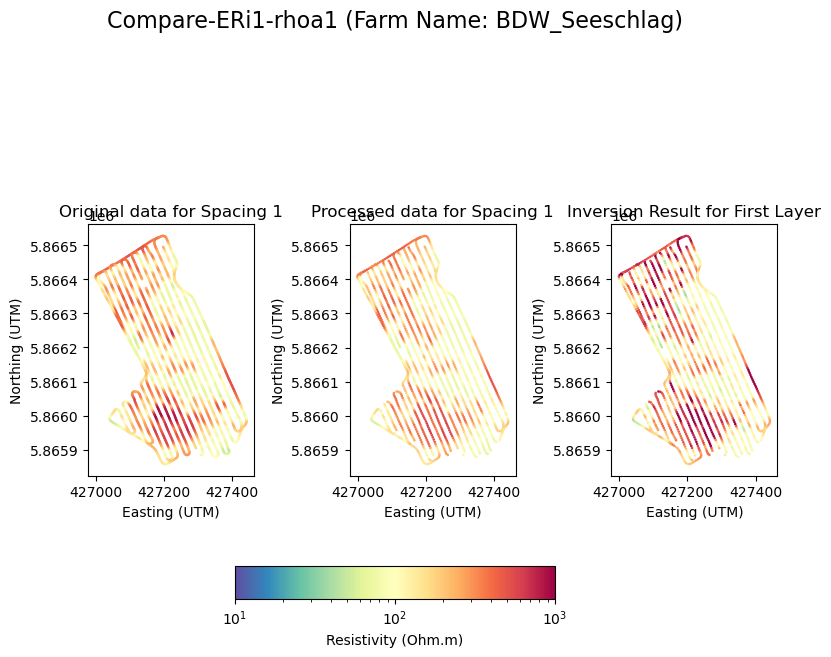

In [19]:
# %% compare ERi1 and rhoa1
# data info
# Create an instance of DataProcessing
data_processor = DataProcessing()  
data_type_org = 'Original'
spacing_labels = ['Spacing 1', 'Spacing 2', 'Spacing 3', 'Spacing 4', 'Spacing 5']

refPoints = data_processor.import_reference_points_from_kml(kmlFile, filepath_Original)
data_type_LOF = 'LOF'
harmfit_onLOF_filepath = f"harmfitted_{data_type_LOF}_{farmName}.txt"

# inv resultt
lam =30
inv_res_filepath = f'1Dinv_response_all_lines_{farmName_Processed}.csv'

inversion_obj.subplot_compare_data_and_inversion_result(farmName, filepath_Original, harmfit_onLOF_filepath, inv_res_filepath)


### Plotting 3D Inversion Results

Visualizing inversion results in three dimensions provides valuable insights into the spatial distribution and depth variations of resistivity within the study area. 

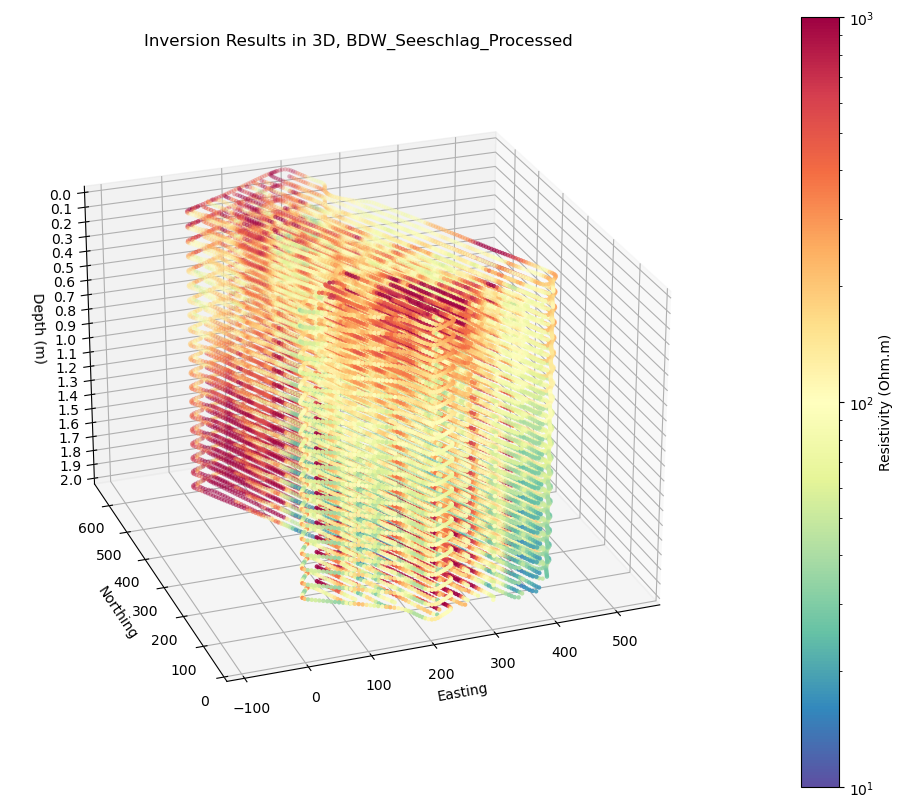

In [20]:
#%% plot_3d_invResult
farmName_Processed = farmName_Processed
inv_res_filepath = f'1Dinv_response_all_lines_{farmName_Processed}.csv'
# Set the view angle
elev=25
azim=250
inversion_obj.plot_3d_invResult(inv_res_filepath, farmName_Processed, elev, azim)